### extract text from wikipedia (api)

In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a wikipedia page title
    '''

    params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, # title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
    }

    # send a request to the wikipedia api
    response = requests.get(
      'https://en.wikipedia.org/w/api.php',
      params= params
    ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))


    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"
    # first get the text from the wikipedia page with

In [32]:
text = wikipedia_page('Earth')
text.lower()[:500]

"earth is the third planet from the sun and home to all known life. while large volumes of water can be found throughout the solar system, only earth sustains liquid surface water. approximately 70.8% of earth's surface is made up of the ocean, dwarfing earth's polar ice, lakes, and rivers. the remaining 29.2% of earth's surface is land, consisting of continents and islands. earth's surface layer is formed of several slowly moving tectonic plates, which interact to produce mountain ranges, volcan"

### words cloud

In [39]:
from collections import Counter

# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

for w in word_counts.most_common(20):
    print(f"{w[0]}:\t{w[1]}")

the:	640
of:	357
and:	294
is:	177
to:	171
in:	135
a:	127
Earth's:	118
Earth:	72
with:	71
from:	69
The:	68
by:	68
as:	64
that:	62
at:	51
are:	50
surface:	45
on:	43
about:	42


In [46]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word.lower() not in stopwords ]

Counter(words_without_stopwords).most_common(20)

[("Earth's", 118),
 ('Earth', 72),
 ('surface', 45),
 ('on', 43),
 ('about', 42),
 ('million', 36),
 ('which', 35),
 ('have', 35),
 ('or', 33),
 ('it', 32),
 ('has', 32),
 ('into', 32),
 ('water', 26),
 ('solar', 26),
 ('life', 26),
 ('Sun', 25),
 ('be', 25),
 ('than', 25),
 ('crust', 25),
 ('atmosphere', 24)]

In [50]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
    random_state = 8,
    normalize_plurals = False,
    width = 600,
    height= 300,
    max_words = 300,
    stopwords = []
)
# wordcloud = WordCloud()

# Apply the wordcloud to the text.
wordcloud.generate(' '.join(words_without_stopwords))

(-0.5, 599.5, 299.5, -0.5)

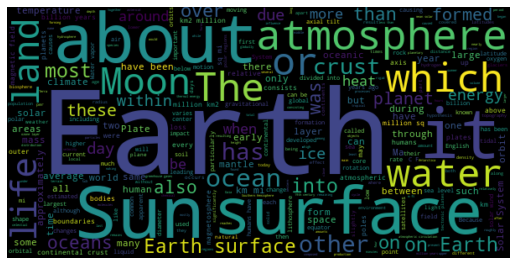

In [51]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

### Tokenization

In [58]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Tokenize the sentence
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

[('the', 644), (',', 606), ('.', 504), ('of', 358), ('and', 298), ('Earth', 262), ('is', 180), ('to', 171), ('s', 166), ("'", 165), ('in', 140), ('a', 133), ('(', 113), ('The', 99), ('-', 83), ('with', 71), ('from', 69), ('by', 68), ('as', 64), ('that', 62)]


In [59]:
# example of character tokenization
char_tokens = [ c for c in text ]

# print the 20 most commons characters
print(Counter(char_tokens).most_common(10))

[(' ', 9034), ('e', 5356), ('t', 4200), ('a', 4095), ('i', 3260), ('o', 3230), ('r', 3073), ('n', 3017), ('s', 3011), ('h', 2223)]


In [61]:
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# Only keep the bigrams 
bigrams = [w for w in  ngrams(tokens,n=2)]

print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [68]:
# trigrams
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['How_much_wood', 'much_wood_would', 'wood_would_a', 'would_a_woodchuck', 'a_woodchuck_chuck', 'woodchuck_chuck_if', 'chuck_if_a', 'if_a_woodchuck', 'a_woodchuck_could', 'woodchuck_could_chuck', 'could_chuck_wood', 'chuck_wood_?']


### EX

In [72]:
text = wikipedia_page('Earth').lower()
tokenizer = WordPunctTokenizer()
words_token = tokenizer.tokenize(text)
word_counts.most_common(20)

[('the', 640),
 ('of', 357),
 ('and', 294),
 ('is', 177),
 ('to', 171),
 ('in', 135),
 ('a', 127),
 ("Earth's", 118),
 ('Earth', 72),
 ('with', 71),
 ('from', 69),
 ('The', 68),
 ('by', 68),
 ('as', 64),
 ('that', 62),
 ('at', 51),
 ('are', 50),
 ('surface', 45),
 ('on', 43),
 ('about', 42)]

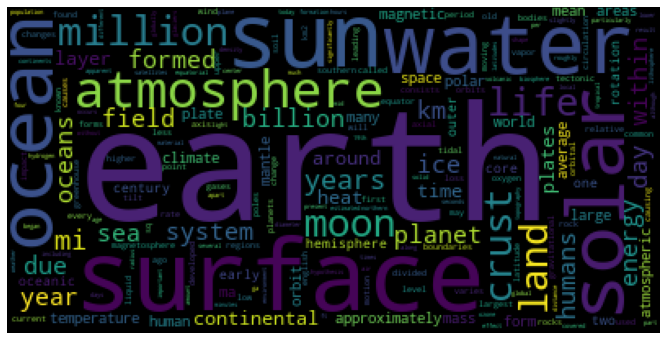

In [77]:
wordcloud = WordCloud(
    collocations=False,
    normalize_plurals=False,
    include_numbers=False,
    min_word_length=2,
)
wordcloud.generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [78]:
stopwords = list(WordCloud().stopwords)
text_without_stopwords = [word for word in words_token if word not in stopwords]

In [87]:
unigrams = WordPunctTokenizer().tokenize(' '.join(text_without_stopwords))

bigrams = [c for c in ngrams(text_without_stopwords, 2)]
bigrams = ['_'.join(w) for w in bigrams]

trigrams = [c for c in ngrams(text_without_stopwords, 3)]
trigrams = ['_'.join(w) for w in trigrams]

print(bigrams[:20], '\n\n', trigrams[:20])

['earth_third', 'third_planet', 'planet_sun', 'sun_home', 'home_known', 'known_life', 'life_.', '._large', 'large_volumes', 'volumes_water', 'water_found', 'found_throughout', 'throughout_solar', 'solar_system', 'system_,', ',_earth', 'earth_sustains', 'sustains_liquid', 'liquid_surface', 'surface_water'] 

 ['earth_third_planet', 'third_planet_sun', 'planet_sun_home', 'sun_home_known', 'home_known_life', 'known_life_.', 'life_._large', '._large_volumes', 'large_volumes_water', 'volumes_water_found', 'water_found_throughout', 'found_throughout_solar', 'throughout_solar_system', 'solar_system_,', 'system_,_earth', ',_earth_sustains', 'earth_sustains_liquid', 'sustains_liquid_surface', 'liquid_surface_water', 'surface_water_.']


In [89]:
tokens = unigrams + bigrams + trigrams

print(f"we have a total of {len(tokens)} tokens, including: \n- {len(unigrams)} unigrams \n- {len(bigrams)} bigrams \n- {len(trigrams)} trigrams. ")

we have a total of 23550 tokens, including: 
- 7851 unigrams 
- 7850 bigrams 
- 7849 trigrams. 
